In [1]:
from util._io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np
import logging
from scannotation import ASAPP
from util._dataloader import DataSet
from util import _topics


import matplotlib.pylab as plt
import seaborn as sns
import colorcet as cc

from util import _sim as _sim
from scipy import stats
from sklearn.metrics import mean_squared_error as mse


experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())



dl = DataSet()
dl.config = args
dl.initialize_path()
print(dl.inpath)
print(dl.outpath)


logging.basicConfig(filename=dl.outpath+'_model.log',
						format='%(asctime)s %(levelname)-8s %(message)s',
						level=logging.INFO,
						datefmt='%Y-%m-%d %H:%M:%S')




## for sim data
N=1000
K=10
P=2000
X = pd.read_csv(dl.inpath+'_X.csv.gz')
dl.mtx = np.asmatrix(X)
dl.rows = ['c_'+str(i) for i in range(N) ]
dl.cols = ['g_'+str(i) for i in range(P) ]


asap = ASAPP(adata=dl,factorization_mode='batch')
asap.generate_bulk()
asap.factorize()


/home/BCCRC.CA/ssubedi/projects/experiments/asapp/data/simdata/simdata
/home/BCCRC.CA/ssubedi/projects/experiments/asapp/result/simdata/simdata


/home/BCCRC.CA/ssubedi/projects/experiments/asapp/asapp/model/_dcpmf.py:58: RuntimeWarning: invalid value encountered in double_scalars
  improvement = (bound - old_bd) / abs(old_bd)
/home/BCCRC.CA/ssubedi/projects/experiments/asapp/asapp/model/_dcpmfv2.py:62: RuntimeWarning: invalid value encountered in double_scalars
  improvement = (bound - old_bd) / abs(old_bd)
/home/BCCRC.CA/ssubedi/projects/experiments/asapp/asapp/model/_dcpmfv2.py:200: RuntimeWarning: invalid value encountered in double_scalars
  improvement = (bound - old_bd) / abs(old_bd)


	After ITERATION: 0	Objective: -429046005.50	Old objective: -inf	Improvement: nan
	After ITERATION: 1	Objective: -430456534.74	Old objective: -429046005.50	Improvement: -0.00329
	After ITERATION: 2	Objective: -428454882.61	Old objective: -430456534.74	Improvement: 0.00465
	After ITERATION: 3	Objective: -425698025.01	Old objective: -428454882.61	Improvement: 0.00643
	After ITERATION: 4	Objective: -423262424.97	Old objective: -425698025.01	Improvement: 0.00572
	After ITERATION: 5	Objective: -421327935.42	Old objective: -423262424.97	Improvement: 0.00457
	After ITERATION: 6	Objective: -419832723.41	Old objective: -421327935.42	Improvement: 0.00355
	After ITERATION: 7	Objective: -418678365.02	Old objective: -419832723.41	Improvement: 0.00275
	After ITERATION: 8	Objective: -417779376.54	Old objective: -418678365.02	Improvement: 0.00215
	After ITERATION: 9	Objective: -417070477.41	Old objective: -417779376.54	Improvement: 0.00170
	After ITERATION: 10	Objective: -416503780.86	Old objective: -

In [2]:
asapsc = ASAPP(adata=dl,experiment_mode='sc',factorization_mode='batch')
asapsc.factorize()
# asapsc.save_model()
 
 

	After ITERATION: 0	Objective: -256773577.38	Old objective: -inf	Improvement: nan
	After ITERATION: 1	Objective: -256496541.30	Old objective: -256773577.38	Improvement: 0.00108
	After ITERATION: 2	Objective: -252712565.31	Old objective: -256496541.30	Improvement: 0.01475
	After ITERATION: 3	Objective: -249537253.77	Old objective: -252712565.31	Improvement: 0.01256
	After ITERATION: 4	Objective: -247373403.97	Old objective: -249537253.77	Improvement: 0.00867
	After ITERATION: 5	Objective: -245940867.11	Old objective: -247373403.97	Improvement: 0.00579
	After ITERATION: 6	Objective: -244980796.48	Old objective: -245940867.11	Improvement: 0.00390
	After ITERATION: 7	Objective: -244321891.01	Old objective: -244980796.48	Improvement: 0.00269
	After ITERATION: 8	Objective: -243857627.77	Old objective: -244321891.01	Improvement: 0.00190
	After ITERATION: 9	Objective: -243522062.98	Old objective: -243857627.77	Improvement: 0.00138
	After ITERATION: 10	Objective: -243273784.98	Old objective: -2

batch

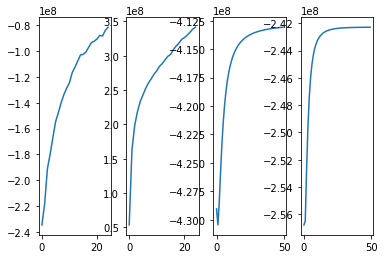

In [3]:
figure,axis = plt.subplots(1,4)
axis[0].plot(asap.model.bound)
axis[1].plot(asapsc.model.bound)

axis[2].plot(asap.model.bound_t)
axis[3].plot(asapsc.model.bound_t)


all data

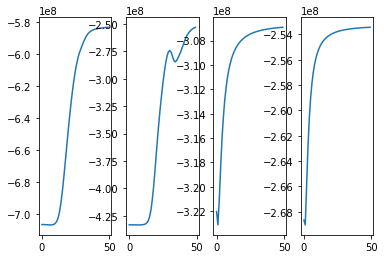

In [11]:
figure,axis = plt.subplots(1,4)
axis[0].plot(asap.model.bound)
axis[1].plot(asapsc.model.bound)

axis[2].plot(asap.model.bound_t)
axis[3].plot(asapsc.model.bound_t)


In [6]:
import umap
df_sctheta = pd.DataFrame(asap.model.Etheta)
df_btheta = pd.DataFrame(asapsc.model.Etheta)
df_umap= pd.DataFrame()
df_umap['cell'] = dl.rows
df_umap['topic_sc'] = [x for x in df_sctheta.iloc[:,1:].idxmax(axis=1)]
df_umap['topic_bulk'] = [x for x in df_btheta.iloc[:,1:].idxmax(axis=1)]

umap_2d = umap.UMAP(n_components=2, init='random', random_state=0,min_dist=0.0,metric='cosine')
proj_2d = umap_2d.fit(df_sctheta.iloc[:,1:])
df_umap[['umap1','umap2']] = umap_2d.embedding_[:,[0,1]]
df_umap


,cell,topic_sc,topic_bulk,umap1,umap2
0,c_0,6,7,6.012356,4.661534
1,c_1,6,7,7.239276,3.754686
2,c_2,6,7,5.547769,3.775382
3,c_3,6,7,3.177753,1.664047
4,c_4,6,7,5.600156,3.860253
...,...,...,...,...,...
995,c_995,2,1,3.954217,11.665957
996,c_996,8,3,3.161503,-2.559277
997,c_997,4,2,4.680972,11.079493
998,c_998,2,1,5.982824,4.854490


Text(0, 0.5, 'UMAP2')

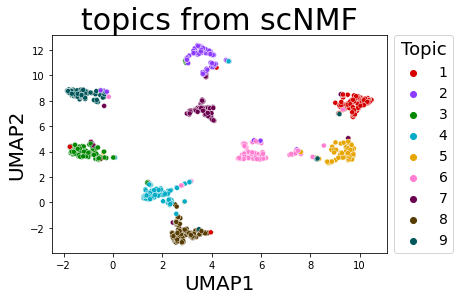

In [7]:
cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic_sc'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic_sc',s=25,palette=cp,legend=True)
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("topics from scNMF",fontsize=30)
p.set_xlabel("UMAP1",fontsize=20)
p.set_ylabel("UMAP2",fontsize=20)

Text(0, 0.5, 'UMAP2')

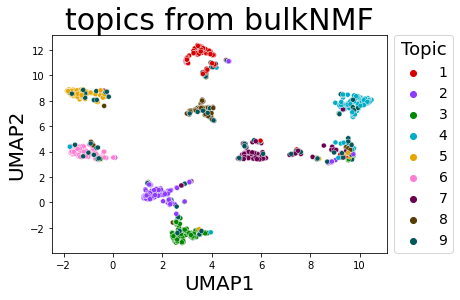

In [8]:
cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic_bulk'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic_bulk',s=25,palette=cp,legend=True)
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("topics from bulkNMF",fontsize=30)
p.set_xlabel("UMAP1",fontsize=20)
p.set_ylabel("UMAP2",fontsize=20)

Text(33.0, 0.5, 'bulk')

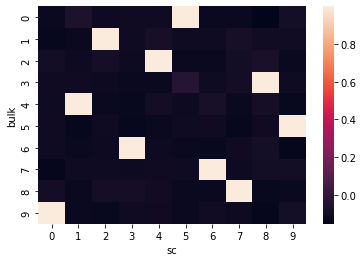

In [9]:
df_scbeta = pd.DataFrame(asap.model.Ebeta)
df_bbeta = pd.DataFrame(asapsc.model.Ebeta)


sel_top_genes = list(np.unique(_topics.get_topic_top_genes(df_scbeta.iloc[:,1:],top_n=10)['Gene'].values))
K=10
corr=[]
for i in range(K):
    cr = []
    for j in range(K):
        cr.append(np.corrcoef(df_bbeta.loc[i,sel_top_genes],df_scbeta.loc[j,sel_top_genes])[0,1])
    corr.append(cr)
sns.heatmap(corr)
plt.xlabel('sc')
plt.ylabel('bulk')

/home/BCCRC.CA/ssubedi/.conda/envs/ssubedi/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


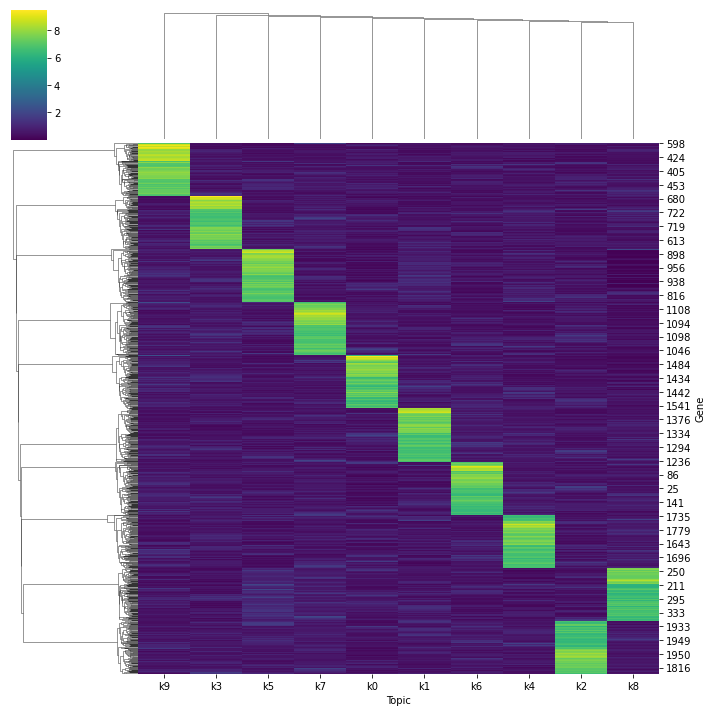

In [10]:
df_top = _topics.get_topic_top_genes(df_scbeta.iloc[:,1:],top_n=100)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')